In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import scipy.io as sio


In [3]:
def is_edge_pixel(matrix, i, j, count_corners=False, count_both_mat=False):
    # Get the shape of the matrix
    rows, cols = matrix.shape

    # Check if the pixel is an edge pixel
    if count_both_mat:
        if matrix[i, j] == 1:
            if count_corners:
                # Check the 8 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or #Above
                        i < rows - 1 and matrix[i + 1, j] == 0 or #below
                        j > 0 and matrix[i, j - 1] == 0 or #Left
                        j < cols - 1 and matrix[i, j + 1] == 0 or #Right
                        i > 0 and j > 0 and matrix[i - 1, j - 1] == 0 or
                        i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 0 or
                        i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 0 or
                        i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 0
                )
            else:
                # Check the 4 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or
                        i < rows - 1 and matrix[i + 1, j] == 0 or
                        j > 0 and matrix[i, j - 1] == 0 or
                        j < cols - 1 and matrix[i, j + 1] == 0
                )
        elif matrix[i, j] == 0:
            if count_corners:
                # Check the 8 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 1 or #Above
                        i < rows - 1 and matrix[i + 1, j] == 1 or #below
                        j > 0 and matrix[i, j - 1] == 1 or #Left
                        j < cols - 1 and matrix[i, j + 1] == 1 or #Right
                        i > 0 and j > 0 and matrix[i - 1, j - 1] == 1 or
                        i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 1 or
                        i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 1 or
                        i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 1
                )
            else:
                # Check the 4 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 1 or
                        i < rows - 1 and matrix[i + 1, j] == 1 or
                        j > 0 and matrix[i, j - 1] == 1 or
                        j < cols - 1 and matrix[i, j + 1] == 1
                )
            return False
    else: #Count only 1's
        if matrix[i, j] == 1:
            if count_corners:
                # Check the 8 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or
                        i < rows - 1 and matrix[i + 1, j] == 0 or
                        j > 0 and matrix[i, j - 1] == 0 or
                        j < cols - 1 and matrix[i, j + 1] == 0 or
                        i > 0 and j > 0 and matrix[i - 1, j - 1] == 0 or
                        i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 0 or
                        i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 0 or
                        i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 0
                )
            else:
                # Check the 4 neighbors
                return (
                        i > 0 and matrix[i - 1, j] == 0 or
                        i < rows - 1 and matrix[i + 1, j] == 0 or
                        j > 0 and matrix[i, j - 1] == 0 or
                        j < cols - 1 and matrix[i, j + 1] == 0
                )
        else:
            return False

def find_edge_pixels(matrix, count_corners=False, count_both_mat=False):
    """Find the edge pixels in a matrix."""
    # Get the size of the matrix
    n = matrix.shape[0]

    # Initialize an empty list to store the edge pixel locations
    edge_pixels = []

    # Loop over all pixels in the matrix
    for i in range(n):
        for j in range(n):
            # Check if the current pixel is an edge pixel
            if is_edge_pixel(matrix, i, j, count_corners, count_both_mat):
                # If it is, add its location to the list of edge pixel locations
                edge_pixels.append((i, j))

    # Return the list of edge pixel locations
    return edge_pixels

def get_edge_pixels_matrix(matrix, count_corners=False, count_both_mat=False):
    # Create a new matrix filled with zeros
    edge_matrix = np.zeros_like(matrix)

    # Get the edge pixels
    edges = find_edge_pixels(matrix, count_corners, count_both_mat)

    # Set the edge pixels to 1 in the new matrix
    for i, j in edges:
        edge_matrix[i][j] = 1

    return edge_matrix

def flip_edge_pixels_chance(matrix, flip_chance, count_corners=False, count_both_mat=False, seed=None):
    # Set the seed for the random number generator
    random.seed(seed)

    # Get the edge pixels
    edge_pixels = find_edge_pixels(matrix, count_corners, count_both_mat)

    # Create a copy of the matrix so we don't modify the original
    new_matrix = matrix.copy()

    # Flip each edge pixel with the given probability
    for i, j in edge_pixels:
        if random.random() < flip_chance:
            new_matrix[i, j] = 0 if new_matrix[i, j] == 1 else 1

    return new_matrix

def flip_edge_pixels_proportion(matrix, flip_proportion, count_corners=False, count_both_mat=False, seed=None):
    # Set the seed for the random number generator
    random.seed(seed)

    # Get the edge pixels
    edge_pixels = find_edge_pixels(matrix, count_corners, count_both_mat)

    # Shuffle the edge_pixels list in place
    random.shuffle(edge_pixels)

    # Create a copy of the matrix so we don't modify the original
    new_matrix = matrix.copy()

    # Calculate the number of edge pixels to flip based on the proportion
    total_edge_pixels = len(edge_pixels)
    flip_count = int(total_edge_pixels * flip_proportion)

    # Flip "flip_proportion" pixels
    for i, j in edge_pixels[:flip_count]:
        new_matrix[i, j] = 0 if new_matrix[i, j] == 1 else 1

    return new_matrix

def defect_error_rate(original_shape, defective_shape, percentage=True):
    # Get the shape of the matrices
    rows, cols = original_shape.shape

    # Initialize a variable to count the number of mismatched pixels
    mismatched_pixels = 0

    # Loop through the pixels and count the mismatched ones
    for i in range(rows):
        for j in range(cols):
            if original_shape[i, j] != defective_shape[i, j]:
                mismatched_pixels += 1

    if percentage:
        # Calculate the defect error rate as the proportion of mismatched pixels to the total number of pixels
        total_pixels = rows * cols
        defect_error_rate = mismatched_pixels / total_pixels * 100
        return defect_error_rate
    else:
        # Return the absolute number of mismatched pixels
        return mismatched_pixels

def visualize_matrices(matrix1, matrix2):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the size as needed

    # Display the first image in the first subplot
    axes[0].imshow(matrix1, cmap='gray_r')
    axes[0].axis('off')

    # Display the second image in the second subplot
    axes[1].imshow(matrix2, cmap='gray_r')
    axes[1].axis('off')


In [4]:
def generate_geometry(size, symmetry, volume_fraction, seed=None):
    if seed is not None:
        np.random.seed(seed)

    if symmetry == 0:
        # Calculate the number of pixels to be filled
        num_pixels = int(round(size * size * volume_fraction))
        # Initialize an array of zeros
        image = np.zeros((size, size))
        # Randomly choose pixels to fill
        fill_indices = np.random.choice(size*size, num_pixels, replace=False)
        image.put(fill_indices, 1)
    elif symmetry == 1:
        half_size = size // 2
        num_pixels = int(round(half_size * size * volume_fraction))
        half_image = np.zeros((size, half_size))
        fill_indices = np.random.choice(half_size*size, num_pixels, replace=False)
        half_image.put(fill_indices, 1)
        # Mirror the half image
        image = np.concatenate((half_image, np.fliplr(half_image)), axis=1)
    elif symmetry == 2:
        quarter_size = size // 2
        num_pixels = int(round(quarter_size * quarter_size * volume_fraction))
        quarter_image = np.zeros((quarter_size, quarter_size))
        fill_indices = np.random.choice(quarter_size*quarter_size, num_pixels, replace=False)
        quarter_image.put(fill_indices, 1)
        # Mirror the quarter image
        half_image = np.concatenate((quarter_image, np.flipud(quarter_image)), axis=0)
        image = np.concatenate((half_image, np.fliplr(half_image)), axis=1)
    else:
        raise ValueError("Symmetry should be 0, 1, or 2.")

    return image

In [5]:
def generate_mutations(image, n, symmetry, volume_fraction, flip_chance, flip_proportion, use_flip_chance=True, scale=1, count_corners=False, count_both_mat=False, seed=None):
    '''
    :param image: original image, pixel array of 0s and 1s
    :param n: number of mutations to generate
    :param size: OBSOLETE
    :param symmetry: OBSOLETE
    :param volume_fraction: OBSOLETE
    :param flip_chance: edge pixel flip probability
    :param flip_proportion: edge pixel flip count
    :param use_flip_chance: use edge pixel flip probability or count
    :param count_corners: count touching corners as edge pixels
    :param count_both_mat: count both white and black pixels as edge pixels
    :param seed: random seed
    :return:
    '''
    # Initialize a list to store the matrices
    matrices = []
    image = np.repeat(np.repeat(image, scale, axis=0), scale, axis=1)
    #matrices.append(image)
    for _ in range(n):
        # Flip the edge pixels
        if use_flip_chance:
            flipped_image = flip_edge_pixels_chance(image, flip_chance, count_corners, count_both_mat, seed)
        else:
            flipped_image = flip_edge_pixels_proportion(image, flip_proportion, count_corners, count_both_mat, seed)

        # Add the flipped image to the list of matrices
        matrices.append(flipped_image)

    return matrices

(40, 40) (10, 10)


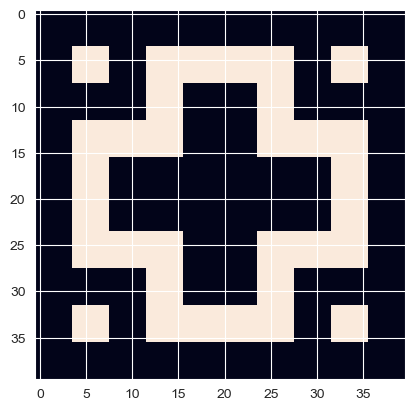

In [20]:
matrix = generate_geometry(10, 2, 0.75, 1)
# matrix = np.array([
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
#     [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
#     [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
#     [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
# ])
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
    [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
#plt.imshow(matrix, cmap='gray_r')
scale = 4
scaled_matrix = np.repeat(np.repeat(matrix, scale, axis=0), scale, axis=1)
plt.imshow(scaled_matrix)
print(scaled_matrix.shape, matrix.shape)

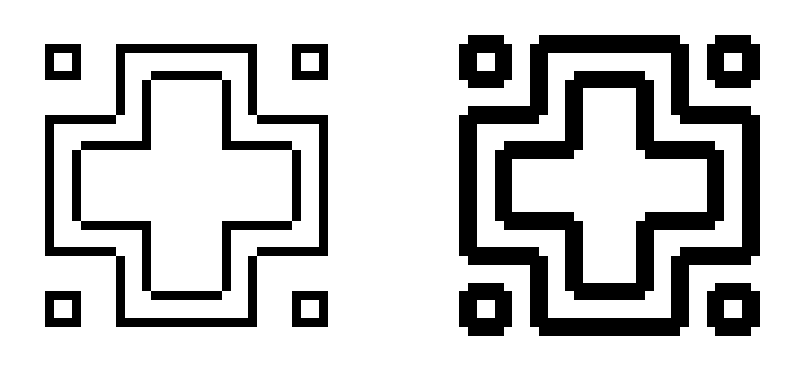

In [21]:
#print(find_edge_pixels(scaled_matrix))
edge_matrix = get_edge_pixels_matrix(scaled_matrix, count_corners=False, count_both_mat=False)
edge_matrix_both_mat = get_edge_pixels_matrix(scaled_matrix, count_corners=False, count_both_mat=True)
#visualize_matrices(scaled_matrix, edge_matrix)
visualize_matrices(edge_matrix, edge_matrix_both_mat)

512 508
1.625


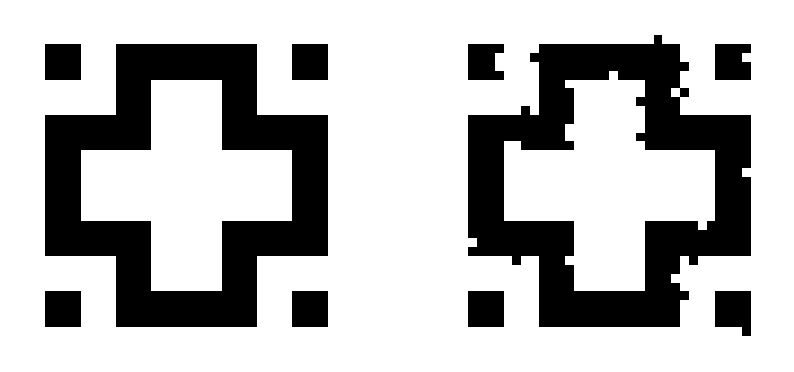

In [22]:
# Flip the edge pixels with a 50% chance
# error_matrix = flip_edge_pixels_chance(scaled_matrix,
#                                        flip_chance=.05,
#                                        count_corners=False,
#                                        count_both_mat=True,
#                                        seed=0)
error_matrix = flip_edge_pixels_proportion(scaled_matrix,
                                       flip_proportion=0.05,
                                       count_corners=False,
                                       count_both_mat=True,
                                       seed=0)

# Display the original and flipped images side by side
visualize_matrices(scaled_matrix, error_matrix)
print(np.sum(scaled_matrix==1), np.sum(error_matrix==1))
print(defect_error_rate(scaled_matrix, error_matrix, percentage=True))

(40, 40)


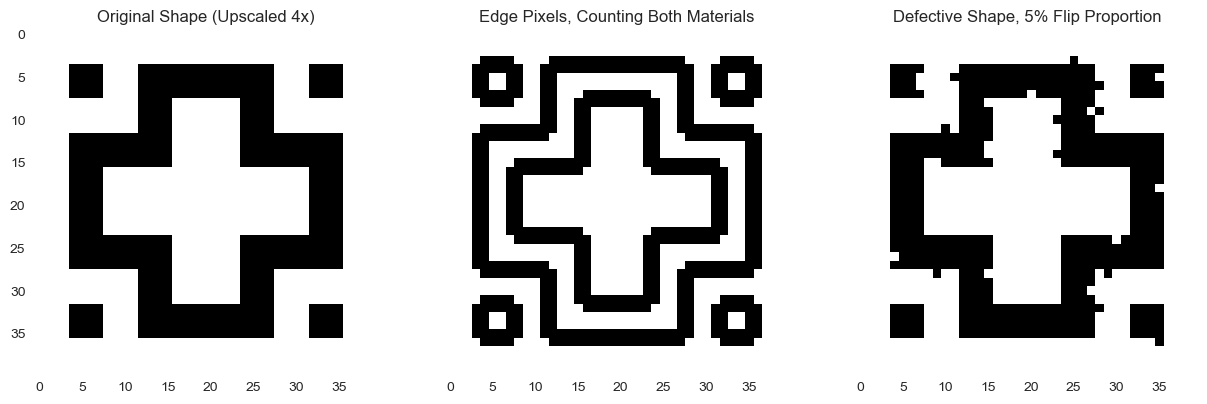

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
print(scaled_matrix.shape)
# Plotting the 1st image in the first subplot
axes[0].imshow(scaled_matrix, cmap='gray_r')
axes[0].set_title('Original Shape (Upscaled 4x)')
axes[0].grid(False)
for spine in axes[0].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# Plotting the 2nd image in the second subplot
axes[1].imshow(edge_matrix_both_mat, cmap='gray_r')
axes[1].set_title('Edge Pixels, Counting Both Materials')
axes[1].grid(False)
for spine in axes[1].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

# Plotting the 3rd image in the third subplot
axes[2].imshow(error_matrix, cmap='gray_r')
axes[2].set_title('Defective Shape, 5% Flip Proportion')
axes[2].grid(False)
for spine in axes[2].spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)

#plt.tight_layout()
plt.show()


In [14]:
# error_scale = 2
# scaled_error_matrix = np.repeat(np.repeat(scaled_error_matrix, error_scale, axis=0), error_scale, axis=1)
# plt.imshow(scaled_error_matrix, cmap='gray_r')

In [15]:
# sio.savemat('defect_matrix'+str(scaled_error_matrix.shape[0])+'px_5%.mat', {'error_geometries': scaled_error_matrix})

In [16]:
# Generate 100 matrices
fc_matrices = generate_mutations(
    #image=matrix,
    image=scaled_matrix,
    n=100,
    symmetry=2,
    volume_fraction=0.5,
    flip_chance=0.05,
    flip_proportion=0.05,
    use_flip_chance=True,
    scale=1,
    count_corners=False,
    count_both_mat=True,
    seed=None
)

In [17]:
fp_matrices = generate_mutations(
    image=matrix,
    #image=scaled_matrix,
    n=100,
    symmetry=2,
    volume_fraction=0.5,
    flip_chance=0.05,
    flip_proportion=0.05,
    use_flip_chance=False,
    scale=8,
    count_corners=False,
    count_both_mat=True,
    seed=None
)

In [18]:
# Convert the list of matrices to a 3D numpy array
#matrices_array = np.array(fc_matrices)
matrices_array = np.array(fp_matrices)
print(matrices_array.shape)
print(type(matrices_array[0][0]))
# Export the array to a MATLAB .mat file
inferred_scale = matrices_array[0].shape[0] / 10
print(inferred_scale)
sio.savemat('error_geometries_fp_'+str(matrices_array[0].shape[0])+'px_5%.mat', {'error_geometries': matrices_array})

(100, 80, 80)
<class 'numpy.ndarray'>
8.0


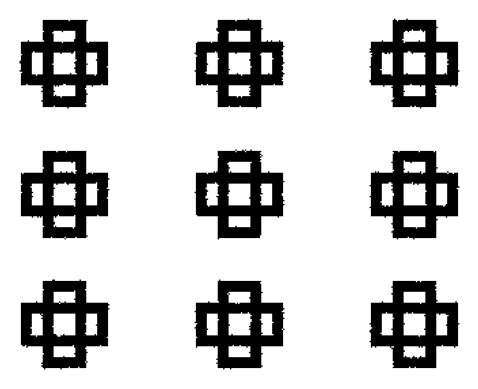

In [19]:
fig, axs = plt.subplots(3, 3)

# Plot the original image in the center
axs[1, 1].imshow(matrices_array[0], cmap='gray_r')
#axs[1, 1].set_title("Original")

# Remove axis for the original image
axs[1, 1].axis('off')

# Get 8 random samples from the matrices
samples = random.sample(list(matrices_array), 8)

# Loop over the subplots and add the images
for i, ax in enumerate(axs.flat):
    # Skip the center subplot
    if i != 4:
        # Adjust the index for samples when i is greater than or equal to 4
        sample_index = i if i < 4 else i - 1

        # Display the image
        ax.imshow(samples[sample_index], cmap='gray_r')

        # Remove the axes
        ax.axis('off')

# Show the plot
plt.show()

In [17]:
fc_generated_mutations_defect_rates = np.zeros(len(fc_matrices))
#fc_generated_mutations_defect_rates = [0 for _ in range(len(fc_matrices))]
for i, matrix in enumerate(fc_matrices):
    fc_generated_mutations_defect_rates[i] = defect_error_rate(scaled_matrix, matrix, percentage=True)

fp_generated_mutations_defect_rates = np.zeros(len(fp_matrices))
#fp_generated_mutations_defect_rates = [0 for _ in range(len(fp_matrices))]
for i, matrix in enumerate(fp_matrices):
    fp_generated_mutations_defect_rates[i] = defect_error_rate(scaled_matrix, matrix, percentage=True)

print(np.mean(fp_generated_mutations_defect_rates), np.mean(fc_generated_mutations_defect_rates))

36.01 1.709375


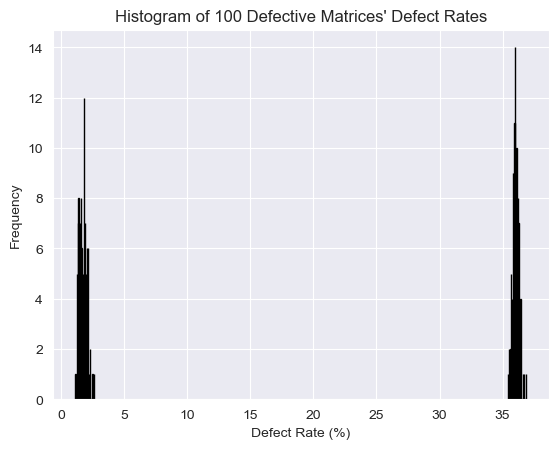

In [18]:
plt.hist(fc_generated_mutations_defect_rates, bins=50, color='skyblue', edgecolor='black')
plt.hist(fp_generated_mutations_defect_rates, bins=50, color='red', edgecolor='black')

# Adding labels and a title
plt.xlabel('Defect Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of 100 Defective Matrices\' Defect Rates')

# Display the histogram
plt.show()

Geometry Generation for Gaussian 6+1 Inputs Quadrature Rule Study

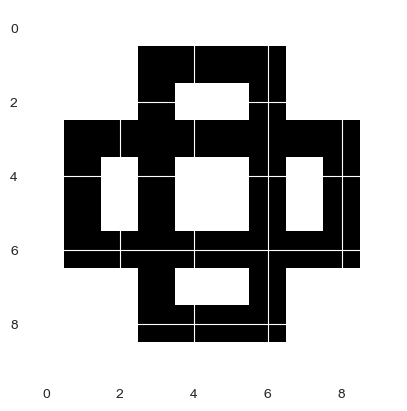

In [29]:
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
# matrix = np.array([
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
#     [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
# ])
plt.imshow(matrix, cmap='gray_r')

In [30]:
# study_folder = 'gaussian 6+1 inputs quadrature rule study'
#
# geo_dist_trunc_pd_1 = sio.loadmat(os.path.join(study_folder, 'geo_dist_trunc_pd_1.mat'))['pd_1_geos'].flatten()
# geo_dist_trunc_pd_2 = sio.loadmat(os.path.join(study_folder, 'geo_dist_trunc_pd_2.mat'))['pd_2_geos'].flatten()
# geo_dist_trunc_pd_3 = sio.loadmat(os.path.join(study_folder, 'geo_dist_trunc_pd_3.mat'))['pd_3_geos'].flatten()
# geo_dist_trunc = {
#     'pd_1_geos': geo_dist_trunc_pd_1,
#     'pd_2_geos': geo_dist_trunc_pd_2,
#     'pd_3_geos': geo_dist_trunc_pd_3,
# }

In [19]:
study_folder = 'gamma beta 6+1 inputs quadrature rule study'

geo_dist_beta_pd_1 = sio.loadmat(os.path.join(study_folder, 'geo_dist_beta_pd_1.mat'))['pd_1_geos'].flatten()
geo_dist_beta_pd_2 = sio.loadmat(os.path.join(study_folder, 'geo_dist_beta_pd_2.mat'))['pd_2_geos'].flatten()
geo_dist_beta_pd_3 = sio.loadmat(os.path.join(study_folder, 'geo_dist_beta_pd_3.mat'))['pd_3_geos'].flatten()
geo_dist_beta = {
    'pd_1_geos': geo_dist_beta_pd_1,
    'pd_2_geos': geo_dist_beta_pd_2,
    'pd_3_geos': geo_dist_beta_pd_3,
}

In [20]:
mat_scale = 4
scaled_matrix = np.repeat(np.repeat(matrix, mat_scale, axis=0), mat_scale, axis=1)
geo_fp_qr = {
    'pd_1_geos': [],
    'pd_2_geos': [],
    'pd_3_geos': [],
}
# for d, g in geo_dist_trunc.items():
for d, g in geo_dist_beta.items():
    #d = 'pd_#_geos'
    geo_fp_qr_matrices = np.zeros((len(g),scaled_matrix.shape[0], scaled_matrix.shape[1]))
    print(geo_fp_qr_matrices.shape)
    # for i, fp in enumerate(geo_dist_trunc[d]):
    for i, fp in enumerate(geo_dist_beta[d]):
        geo_fp_qr_matrices[i] = flip_edge_pixels_proportion(scaled_matrix, flip_proportion=fp, count_corners=False, count_both_mat=True,
            seed=None)
    geo_fp_qr[d] = geo_fp_qr_matrices
    sio.savemat(os.path.join(study_folder, 'fp_matrices_'+d+'.mat'), {d: geo_fp_qr_matrices})

(128, 40, 40)
(2187, 40, 40)
(16384, 40, 40)


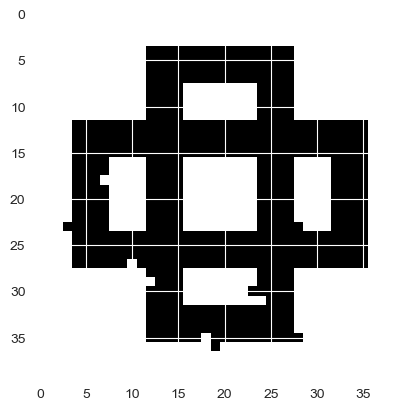

In [21]:
plt.imshow(geo_fp_qr['pd_3_geos'][-400], cmap='gray_r')

Geometry Generation for Gaussian 6+1 Inputs Quadrature Rule Sparse Grid Study

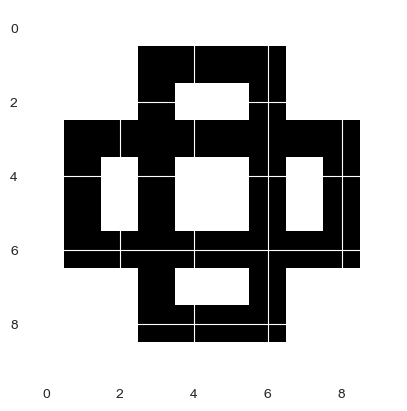

In [5]:
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
# matrix = np.array([
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
#     [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
# ])
plt.imshow(matrix, cmap='gray_r')

In [6]:
study_folder = 'gamma beta 6+1 inputs sparse grid leja study'

geo_dist_beta_pd_1_sparse = sio.loadmat(os.path.join(study_folder, 'geo_dist_beta_pd_1_sparse.mat'))['pd_1_geos'].flatten()
geo_dist_beta_pd_2_sparse = sio.loadmat(os.path.join(study_folder, 'geo_dist_beta_pd_2_sparse.mat'))['pd_2_geos'].flatten()
geo_dist_beta_pd_3_sparse = sio.loadmat(os.path.join(study_folder, 'geo_dist_beta_pd_3_sparse.mat'))['pd_3_geos'].flatten()
geo_dist_beta_sparse = {
    'pd_1_geos': geo_dist_beta_pd_1_sparse,
    'pd_2_geos': geo_dist_beta_pd_2_sparse,
    'pd_3_geos': geo_dist_beta_pd_3_sparse,
}

In [7]:
mat_scale = 4
scaled_matrix = np.repeat(np.repeat(matrix, mat_scale, axis=0), mat_scale, axis=1)
geo_fp_qr_sg = {
    'pd_1_geos': [],
    'pd_2_geos': [],
    'pd_3_geos': [],
}
for d, g in geo_dist_beta_sparse.items():
    #d = 'pd_#'
    geo_fp_qr_sg_matrices = np.zeros((len(g),scaled_matrix.shape[0], scaled_matrix.shape[1]))
    print(geo_fp_qr_sg_matrices.shape)
    for i, fp in enumerate(geo_dist_beta_sparse[d]):
        geo_fp_qr_sg_matrices[i] = flip_edge_pixels_proportion(scaled_matrix, flip_proportion=fp, count_corners=False, count_both_mat=True,
                                                            seed=None)
    geo_fp_qr_sg[d] = geo_fp_qr_sg_matrices
    sio.savemat(os.path.join(study_folder, 'fp_matrices_'+d+'_sparse.mat'), {d: geo_fp_qr_sg_matrices})

(8, 40, 40)
(36, 40, 40)
(120, 40, 40)


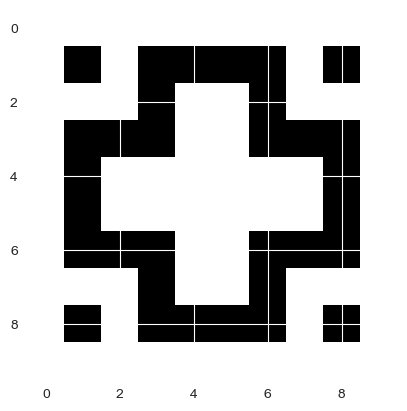

In [14]:
# matrix = np.array([
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
#     [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
#     [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
#     [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
# ])
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
    [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
plt.imshow(matrix, cmap='gray_r')

In [15]:
study_folder = 'gaussian 6+1 inputs sparse grid 2nd geo study'

geo_dist_gauss_trunc_pd_1_sparse = sio.loadmat(os.path.join(study_folder, 'geo_dist_gauss_trunc_pd_1_sparse.mat'))['pd_1_geos'].flatten()
geo_dist_gauss_trunc_pd_2_sparse = sio.loadmat(os.path.join(study_folder, 'geo_dist_gauss_trunc_pd_2_sparse.mat'))['pd_2_geos'].flatten()
geo_dist_gauss_trunc_pd_3_sparse = sio.loadmat(os.path.join(study_folder, 'geo_dist_gauss_trunc_pd_3_sparse.mat'))['pd_3_geos'].flatten()
geo_dist_gauss_trunc_sparse = {
    'pd_1_geos': geo_dist_gauss_trunc_pd_1_sparse,
    'pd_2_geos': geo_dist_gauss_trunc_pd_2_sparse,
    'pd_3_geos': geo_dist_gauss_trunc_pd_3_sparse,
}

In [16]:
mat_scale = 4
scaled_matrix = np.repeat(np.repeat(matrix, mat_scale, axis=0), mat_scale, axis=1)
geo_fp_qr_sg = {
    'pd_1_geos': [],
    'pd_2_geos': [],
    'pd_3_geos': [],
}
for d, g in geo_dist_gauss_trunc_sparse.items():
    #d = 'pd_#'
    geo_fp_qr_sg_matrices = np.zeros((len(g),scaled_matrix.shape[0], scaled_matrix.shape[1]))
    print(geo_fp_qr_sg_matrices.shape)
    for i, fp in enumerate(geo_dist_gauss_trunc_sparse[d]):
        geo_fp_qr_sg_matrices[i] = flip_edge_pixels_proportion(scaled_matrix, flip_proportion=fp, count_corners=False, count_both_mat=True,
                                                               seed=None)
    geo_fp_qr_sg[d] = geo_fp_qr_sg_matrices
    sio.savemat(os.path.join(study_folder, 'fp_matrices_'+d+'_sparse.mat'), {d: geo_fp_qr_sg_matrices})

(15, 40, 40)
(118, 40, 40)
(654, 40, 40)


Geometry Generation for Gaussian 6+1 Inputs MC Study

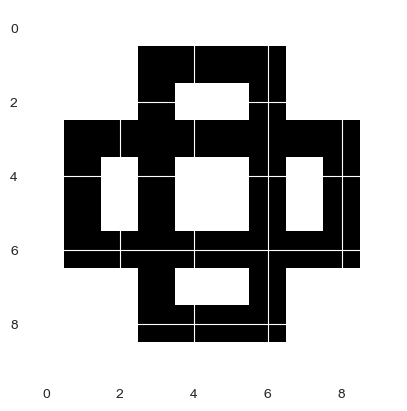

In [6]:
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
# matrix = np.array([
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
#     [0., 1., 1., 1., 0., 0., 1., 1., 1., 0.],
#     [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
#     [0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
#     [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
# ])
plt.imshow(matrix, cmap='gray_r')

In [7]:
# study_folder = 'gaussian 6+1 inputs mc study'
#
# geo_dist_trunc_mc_100 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_trunc_mc_100.mat'))['mc_100_geos'].flatten()
# geo_dist_trunc_mc_1000 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_trunc_mc_1000.mat'))['mc_1000_geos'].flatten()
# geo_dist_trunc_mc_10000 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_trunc_mc_10000.mat'))['mc_10000_geos'].flatten()
#
# geo_dist_trunc_mc = {
#     'mc_100': geo_dist_trunc_mc_100,
#     'mc_1000': geo_dist_trunc_mc_1000,
#     'mc_10000': geo_dist_trunc_mc_10000,
# }

In [8]:
study_folder = 'gamma beta 6+1 inputs mc study'

# geo_dist_beta_mc_100 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_beta_mc_100.mat'))['mc_100_geos'].flatten()
# geo_dist_beta_mc_1000 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_beta_mc_1000.mat'))['mc_1000_geos'].flatten()
# geo_dist_beta_mc_10000 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_beta_mc_10000.mat'))['mc_10000_geos'].flatten()

geo_dist_beta_mc_200 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_beta_mc_200.mat'))['mc_200_geos'].flatten()
geo_dist_beta_mc_250 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_beta_mc_250.mat'))['mc_250_geos'].flatten()
geo_dist_beta_mc_300 = sio.loadmat(os.path.join(study_folder, 'geo_fp_dist_beta_mc_300.mat'))['mc_300_geos'].flatten()

geo_dist_beta_mc = {
    # 'mc_100': geo_dist_beta_mc_100,
    # 'mc_1000': geo_dist_beta_mc_1000,
    # 'mc_10000': geo_dist_beta_mc_10000,
    'mc_200': geo_dist_beta_mc_200,
    'mc_250': geo_dist_beta_mc_250,
    'mc_300': geo_dist_beta_mc_300,
}

In [9]:
mat_scale = 4
scaled_matrix = np.repeat(np.repeat(matrix, mat_scale, axis=0), mat_scale, axis=1)
geo_fp_mc = {
    # 'mc_100': [],
    # 'mc_1000': [],
    # 'mc_10000': [],
    'mc_200': [],
    'mc_250': [],
    'mc_300': []
}
#for d, g in geo_dist_trunc_mc.items():
for d, g in geo_dist_beta_mc.items():
    #d = 'pd_#_geos'
    geo_fp_mc_matrices = np.zeros((len(g),scaled_matrix.shape[0], scaled_matrix.shape[1]))
    print(geo_fp_mc_matrices.shape)
    #for i, fp in enumerate(geo_dist_trunc_mc[d]):
    for i, fp in enumerate(geo_dist_beta_mc[d]):
        geo_fp_mc_matrices[i] = flip_edge_pixels_proportion(scaled_matrix, flip_proportion=fp, count_corners=False, count_both_mat=True,
                                                         seed=None)
    geo_fp_mc[d] = geo_fp_mc_matrices
    sio.savemat(os.path.join(study_folder, 'fp_matrices_'+d+'.mat'), {d+'_geo': geo_fp_mc_matrices})

(200, 40, 40)
(250, 40, 40)
(300, 40, 40)


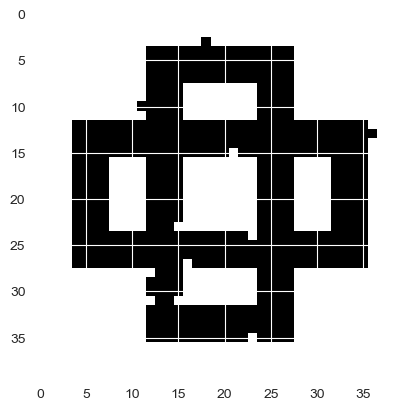

In [26]:
plt.imshow(geo_fp_mc['mc_10000'][-1000], cmap='gray_r')

Check Datasets

In [77]:
from pathlib import Path

path = Path("gaussian 6+1 inputs quadrature rule study/fp_matrices_pd_3_geos.mat")

data = sio.loadmat(path)

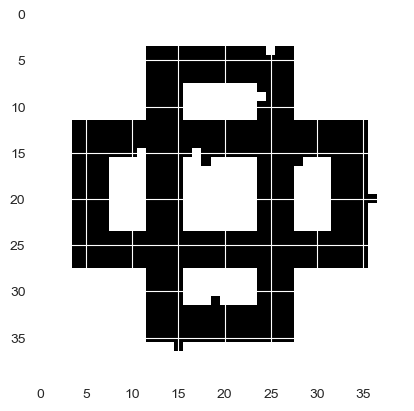

In [79]:
plt.imshow(data['pd_3_geos'][200], cmap='gray_r')